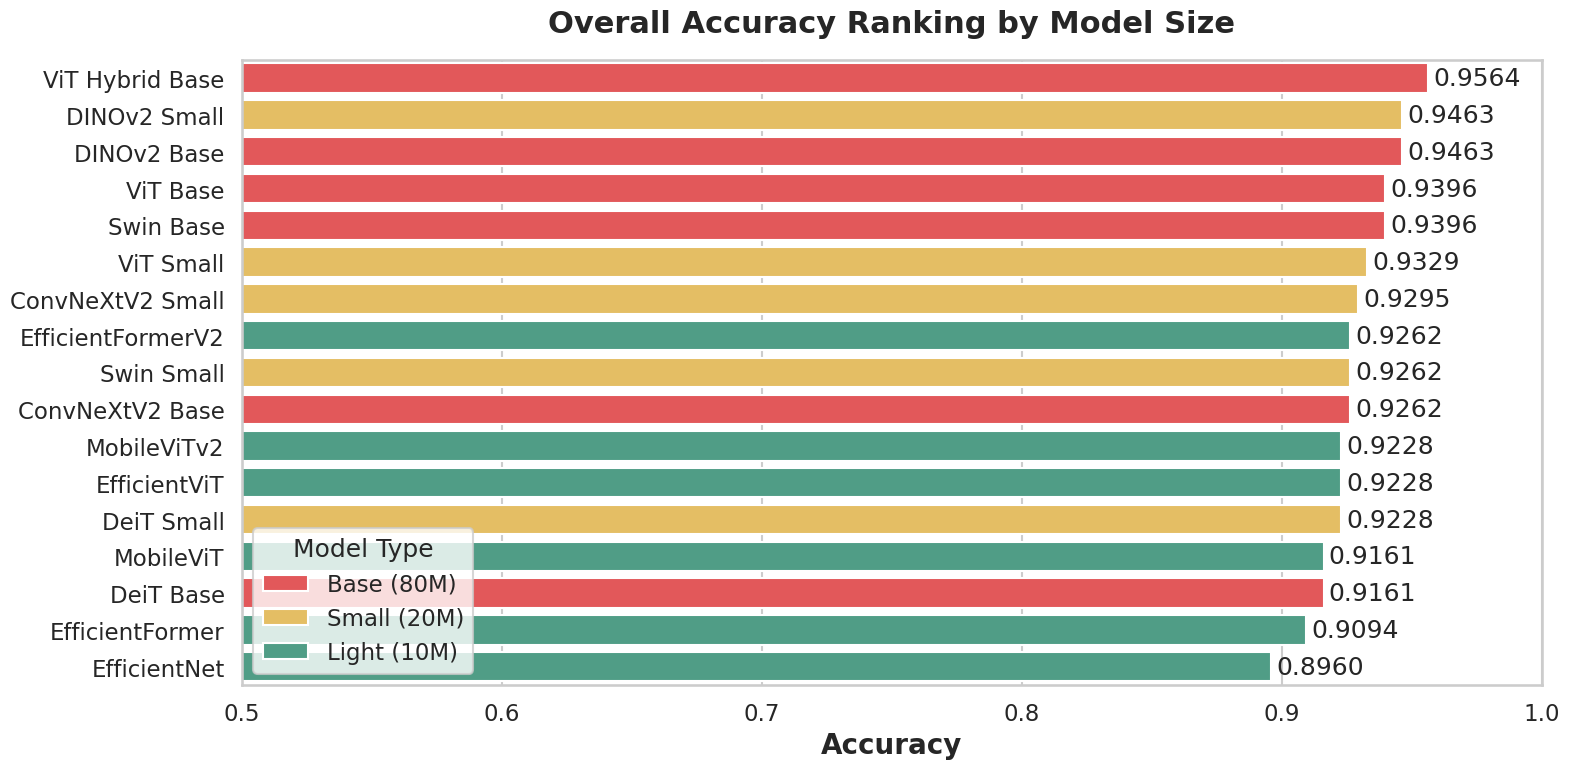

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data
data = {
    "Model": [
        "ConvNeXtV2 Base", "ViT Hybrid Base", "ViT Base", "Swin Base", "DeiT Base", "DINOv2 Base",
        "ViT Small", "Swin Small", "DeiT Small", "ConvNeXtV2 Small", "DINOv2 Small", "MobileViT",
        "MobileViTv2", "EfficientNet", "EfficientViT", "EfficientFormer", "EfficientFormerV2"
    ],
    "Type": [
        "Base (80M)", "Base (80M)", "Base (80M)", "Base (80M)", "Base (80M)", "Base (80M)",
        "Small (20M)", "Small (20M)", "Small (20M)", "Small (20M)", "Small (20M)", "Light (10M)",
        "Light (10M)", "Light (10M)", "Light (10M)", "Light (10M)", "Light (10M)"
    ],
    "Accuracy": [
        0.9262, 0.9564, 0.9396, 0.9396, 0.9161, 0.9463,
        0.9329, 0.92621, 0.9228, 0.9295, 0.9463, 0.91611,
        0.92281, 0.8960, 0.92281, 0.9094, 0.92622
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Sort by Accuracy
df = df.sort_values(by="Accuracy", ascending=False)

# Set Seaborn style
sns.set_theme(style="whitegrid", context="talk")

# Define color palette
palette = {
    "Base (80M)": "#f94144",   # Rich red
    "Small (20M)": "#f9c74f",  # Strong amber
    "Light (10M)": "#43aa8b"   # Bold teal-green
}

# Create the plot
plt.figure(figsize=(16, 8))
barplot = sns.barplot(
    data=df,
    y="Model",
    x="Accuracy",
    hue="Type",
    dodge=False,
    palette=palette
)

# Add accuracy labels to each bar
for i, (accuracy, model) in enumerate(zip(df["Accuracy"], df["Model"])):
    barplot.text(accuracy + 0.002, i, f"{accuracy:.4f}", va="center")

plt.title("Overall Accuracy Ranking by Model Size", fontsize=22, fontweight='bold', pad=20)

# Customize plot aesthetics
plt.xlabel("Accuracy", fontsize=20, fontweight='bold')  # Make x-axis label bold
barplot.set_ylabel('')  # Remove y-axis label
plt.xlim(0.5, 1)  # Increase space after bars by setting the xlim to 1.05
plt.legend(title="Model Type", loc="lower left")

# Adjust layout with specified padding
plt.tight_layout(pad=1.0)

# Save the plot as an image
plt.savefig('model_accuracy_by_type.png', bbox_inches="tight", pad_inches=0.3, dpi=300)

# Display the plot
plt.show()
plt.close()

### Inference

In [23]:
!pip --quiet install adjustText

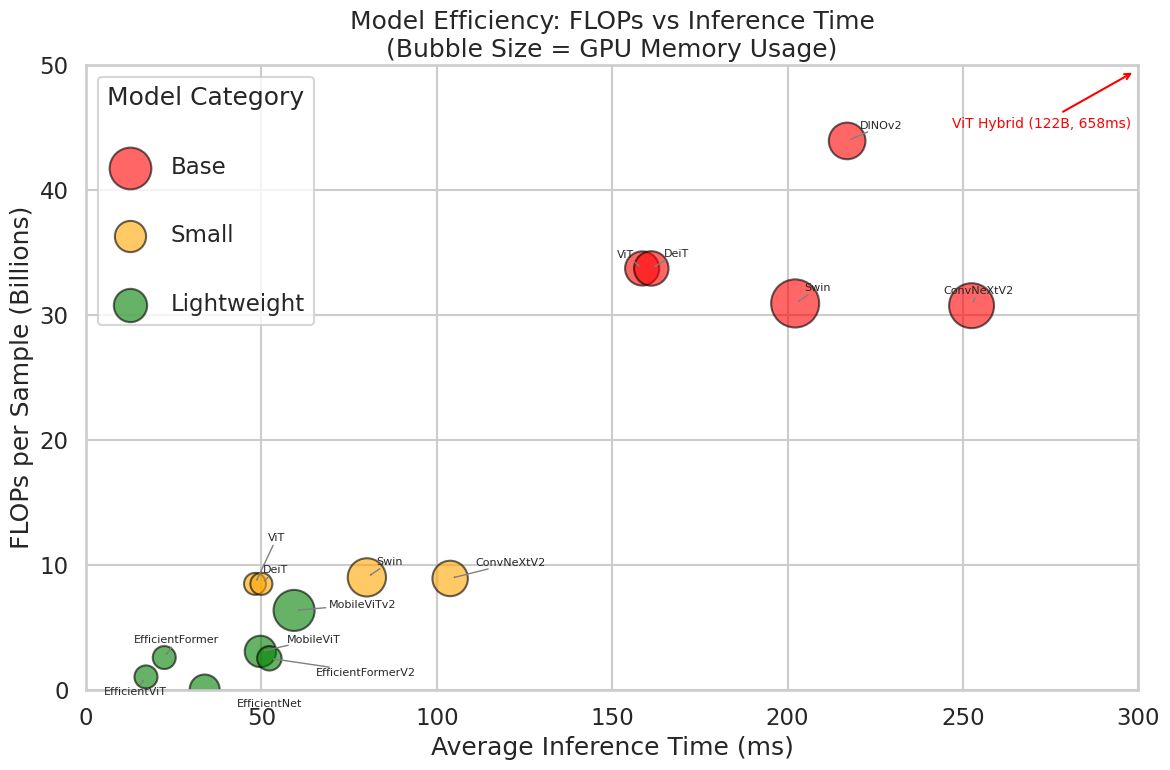

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text
# Updated per-sample data
data = {
    "Model": [
        "ConvNeXtV2 Base", "ViT Base", "Swin Base", "DeiT Base", "DINOv2 Base",
        "ViT Small", "Swin Small", "DeiT Small", "ConvNeXtV2 Small",
        "MobileViT", "MobileViTv2", "EfficientNet", "EfficientViT",
        "EfficientFormer", "EfficientFormerV2"
    ],
    "FLOPs": [
        30_754_101_248, 33_733_301_760, 30_933_620_736, 33_733_301_760,
        43_936_992_768, 8_500_587_264, 9_016_865_280, 8_500_587_264, 8_930_996_736,
        3_092_059_008, 6_373_572_096, 46_609_376, 1_053_133_440,
        2_602_449_024, 2_542_253_088
    ],
    "Inference (ms)": [
        252.48, 158.56, 202.18, 161.16, 217.00,
        48.17, 80.07, 49.99, 103.81,
        49.72, 59.32, 33.82, 17.09,
        22.30, 52.27
    ],
    "GPU Mem (MB)": [
        1049.18, 606.49, 1199.47, 617.48, 697.80,
        249.94, 759.57, 251.73, 650.93,
        511.95, 875.11, 465.87, 275.75,
        273.99, 310.20
    ]
}

# Categorize model type
def classify_model(name):
    if "Base" in name:
        return "Base"
    elif "Small" in name:
        return "Small"
    else:
        return "Lightweight"

# Create DataFrame
df = pd.DataFrame(data)
df["Category"] = df["Model"].apply(classify_model)
df["FLOPs (B)"] = df["FLOPs"] / 1e9  # Convert FLOPs to billions for readability

# Plot
plt.figure(figsize=(12, 8))
colors = {"Base": "red", "Small": "orange", "Lightweight": "green"}
texts = []
for category in df["Category"].unique():
    subset = df[df["Category"] == category]
    plt.scatter(
        subset["Inference (ms)"], subset["FLOPs (B)"],
        s=subset["GPU Mem (MB)"],  # Bubble size based on GPU memory
        c=colors[category], label=category, alpha=0.6, edgecolors='black'
    )

    for i, row in subset.iterrows():
        label = row["Model"].replace(" Base", "").replace(" Small", "")
        texts.append(
            plt.text(
                row["Inference (ms)"],  # X offset right
                row["FLOPs (B)"],       # Y offset up
                label,
                fontsize=8
            )
        )


# Adjust all labels to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1), expand=(2,3))

plt.xlim(0, 300)
plt.ylim(0, 50)
plt.annotate("ViT Hybrid (122B, 658ms)", xy=(299, 49.5), xytext=(247, 45),
             arrowprops=dict(arrowstyle="->", lw=1.5, color="red"), fontsize=10, color='red')

# Labels and formatting
plt.xlabel("Average Inference Time (ms)")
plt.ylabel("FLOPs per Sample (Billions)")
plt.title("Model Efficiency: FLOPs vs Inference Time\n(Bubble Size = GPU Memory Usage)")
plt.legend(title="Model Category", loc="upper left",labelspacing=2)
plt.grid(True)

plt.tight_layout(pad=1.0)
# Save the plot as an image
plt.savefig('model_efficiency_flops_time.png', bbox_inches="tight", pad_inches=0.3, dpi=300)

# Show plot
plt.show()


In [26]:
plt.close()

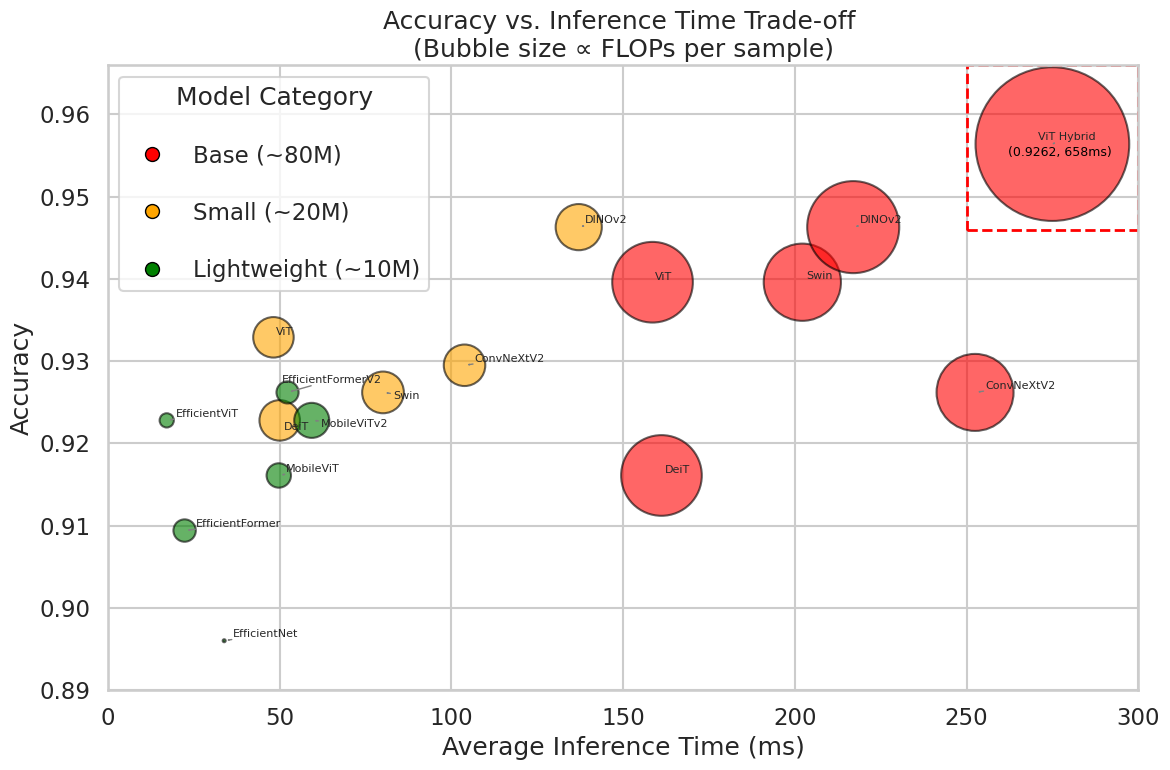

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text

from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle

# Custom legend handles with uniform marker size
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Base (~80M)',
           markerfacecolor='red', markersize=10, markeredgecolor='black'),
    Line2D([0], [0], marker='o', color='w', label='Small (~20M)',
           markerfacecolor='orange', markersize=10, markeredgecolor='black'),
    Line2D([0], [0], marker='o', color='w', label='Lightweight (~10M)',
           markerfacecolor='green', markersize=10, markeredgecolor='black'),
]


# Updated per-sample data
data = {
    "Model": [
        "ConvNeXtV2 Base", "ViT Hybrid Base", "ViT Base", "Swin Base", "DeiT Base", "DINOv2 Base",
        "ViT Small", "Swin Small", "DeiT Small", "ConvNeXtV2 Small", "DINOv2 Small",
        "MobileViT", "MobileViTv2", "EfficientNet", "EfficientViT",
        "EfficientFormer", "EfficientFormerV2"
    ],
    "FLOPs": [
        30_754_101_248, 122_485_430_064, 33_733_301_760, 30_933_620_736, 33_733_301_760,
        43_936_992_768, 8_500_587_264, 9_016_865_280, 8_500_587_264, 8_930_996_736, 11_054_393_088,
        3_092_059_008, 6_373_572_096, 46_609_376, 1_053_133_440,
        2_602_449_024, 2_542_253_088
    ],
    "Inference (ms)": [
        252.48, 275, 158.56, 202.18, 161.16, 217.00,
        48.17, 80.07, 49.99, 103.81, 137.07,
        49.72, 59.32, 33.82, 17.09,
        22.30, 52.27
    ],
    "Accuracy": [
        0.9262, 0.9564, 0.9396, 0.9396, 0.9161, 0.9463,
        0.9329, 0.9262, 0.9228, 0.9295, 0.9463,
        0.9161, 0.9228, 0.8960, 0.9228,
        0.9094, 0.9262
    ]
}

# Categorize model type
def classify_model(name):
    if "Base" in name:
        return "Base"
    elif "Small" in name:
        return "Small"
    else:
        return "Lightweight"

# Create DataFrame
df = pd.DataFrame(data)
df["Category"] = df["Model"].apply(classify_model)
df["FLOPs (B)"] = df["FLOPs"] / 1e7  # Convert FLOPs to billions

# Plot setup
plt.figure(figsize=(12, 8))
colors = {"Base": "red", "Small": "orange", "Lightweight": "green"}
texts = []

# Plot scatter bubbles
for category in df["Category"].unique():
    subset = df[df["Category"] == category]
    plt.scatter(
        subset["Inference (ms)"], subset["Accuracy"],
        s=subset["FLOPs (B)"],
        c=colors[category],
        label=category,
        alpha=0.6,
        edgecolors='black'
    )

    # Label points (top-right)
    for _, row in subset.iterrows():
        label = row["Model"].replace(" Base", "").replace(" Small", "")
        texts.append(
            plt.text(
                row["Inference (ms)"],
                row["Accuracy"],
                label,
                fontsize=8
            )
        )

# Adjust labels to avoid overlap
adjust_text(
    texts,
    arrowprops=dict(arrowstyle='->', color='gray', lw=1),
    expand=(1.2, 1.5)
)

plt.gca().add_patch(
    Rectangle(
        (250, 0.946),     # (x, y) bottom-left corner
        50,               # width of rectangle
        0.02,            # height of rectangle
        edgecolor='red',
        facecolor='none',
        lw=2,
        linestyle='--'
    )
)

plt.annotate("(0.9262, 658ms)", xy=(250, 0.946), xytext=(262, 0.955), fontsize=9, color='black')

# Axes and formatting
plt.xlim(0, 300)
plt.ylim(0.89, 0.966)
plt.xlabel("Average Inference Time (ms)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Inference Time Trade-off \n(Bubble size ∝ FLOPs per sample)")

# Add the uniform legend
plt.legend(
    handles=legend_elements,
    title="Model Category",
    loc="upper left",
    labelspacing=1.5
)
# plt.grid(True)
plt.tight_layout(pad=1.0)

# Save the figure
plt.savefig('model_tradeoff.png', bbox_inches="tight", pad_inches=0.3, dpi=300)

# Show plot
plt.show()


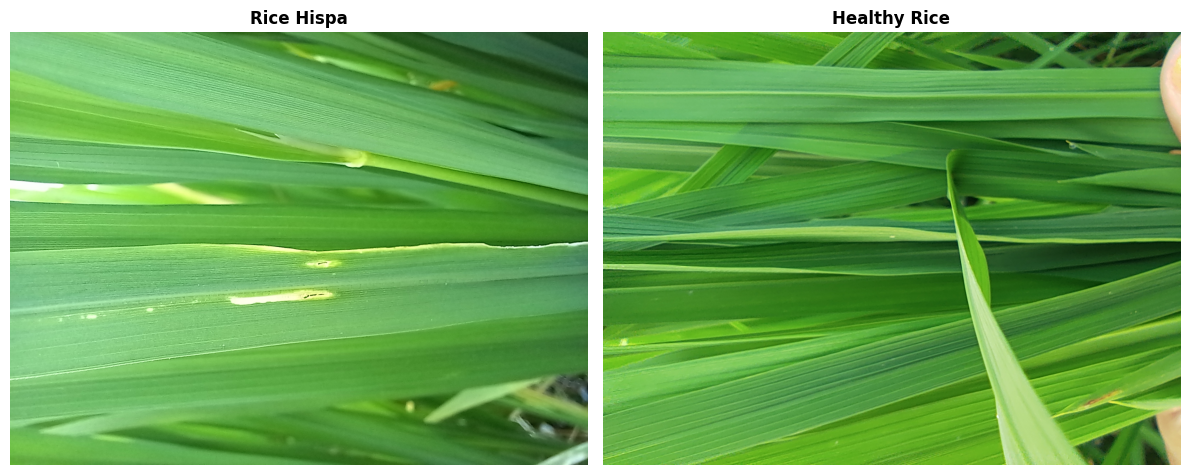

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Map each filename to its full label
# image_filenames = {
#     "nbs_lb.jpg": "Narrow Brown Spot",
#     "nbs_ls.jpg": "Narrow Brown Spot",
#     "nbs_bs.jpg": "Narrow Brown Spot",
#     "lb_nbs.jpg": "Leaf Blast",
#     "ls_nbs.jpg": "Leaf Scald",
#     "bs_nbs.jpg": "Brown Spot",
# }

image_filenames = {
    "rh_hr.jpg": "Rice Hispa",
    "hr_rh.jpg": "Healthy Rice"
}

cols = 2
rows = 1

fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 5))
axes = axes.flatten()

for i, (filename, label) in enumerate(image_filenames.items()):
    img = Image.open(filename)
    ax = axes[i]
    ax.imshow(img)
    ax.set_title(label, fontsize=12, fontweight="bold")
    ax.axis("off")

plt.tight_layout()
plt.savefig("test.png",bbox_inches="tight", pad_inches=0.2)
plt.show()
plt.close()
